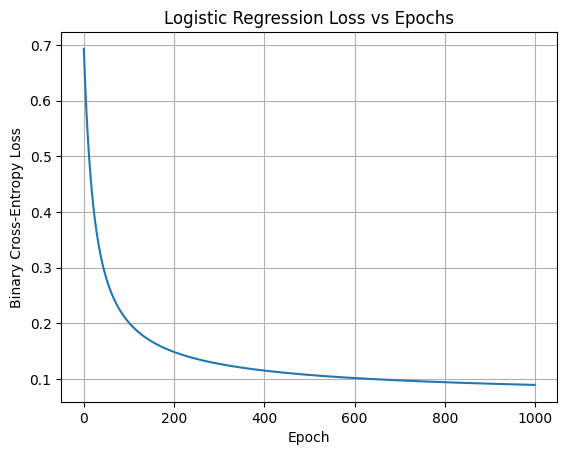

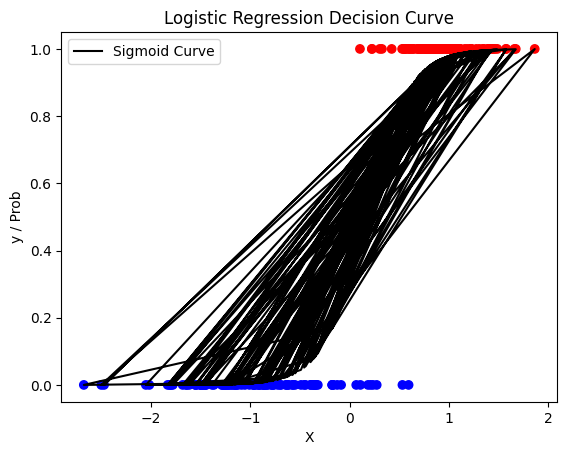

Final weight: [[4.63043081]], Final bias: -0.7846551312098918


In [1]:
# Generate synthetic binary classification data
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=200, n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, random_state=1)

# Reshape
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Initialize weights
w = 0
b = 0

# Hyperparameters
lr = 0.1
epochs = 1000
n = len(X)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
losses = []
for epoch in range(epochs):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    error = y_pred - y
    dw = (1/n) * np.dot(X.T, error)
    db = (1/n) * np.sum(error)
    
    w -= lr * dw
    b -= lr * db
    
    loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
    losses.append(loss)

# Plot loss over epochs
plt.plot(range(epochs), losses)
plt.title("Logistic Regression Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()

# Decision boundary
plt.scatter(X, y, c=y, cmap='bwr')
plt.plot(X, sigmoid(w * X + b), color='black', label='Sigmoid Curve')
plt.title("Logistic Regression Decision Curve")
plt.xlabel("X")
plt.ylabel("y / Prob")
plt.legend()
plt.show()

print(f"Final weight: {w}, Final bias: {b}")